In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [3]:
sales_train = pd.read_csv("sales_train.csv")
items = pd.read_csv("items.csv")
item_categories = pd.read_csv("item_categories.csv")
sample_submission = pd.read_csv("sample_submission.csv")
shops = pd.read_csv("shops.csv")
test = pd.read_csv("test.csv")

In [ ]:
# create plots folder
if not os.path.exists('plots'):
    os.makedirs('plots')

In [4]:
items_df=pd.merge(items,item_categories,how='left',left_on='item_category_id',right_on='item_category_id')

train_df=pd.merge(sales_train,items_df,how='left',left_on='item_id',right_on='item_id')

train_df=pd.merge(train_df,shops,how='left',left_on='shop_id',right_on='shop_id')

In [5]:
import warnings
warnings.filterwarnings("ignore")

train_df['year'] = pd.DatetimeIndex(train_df['date']).year
train_df['month'] = pd.DatetimeIndex(train_df['date']).month
#train_df['day'] = pd.DatetimeIndex(train_df['date']).day

In [6]:
y_2013=train_df.groupby(train_df[train_df['year']==2013].month).count()['item_id']
y_2014=train_df.groupby(train_df[train_df['year']==2014].month).count()['item_id']
y_2015=train_df.groupby(train_df[train_df['year']==2015].month).count()['item_id']

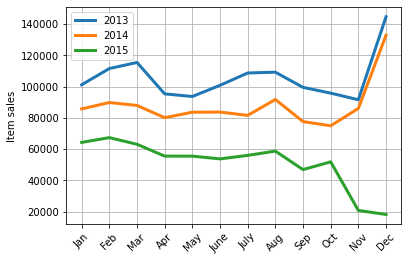

In [17]:
x=np.linspace(1,12,12)
plt.plot(x,y_2013, label='2013', linewidth=3)
plt.plot(x,y_2014, label='2014', linewidth=3)
plt.plot(x,y_2015, label='2015', linewidth=3)
plt.grid()
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, months, rotation=45)
plt.legend()
plt.ylabel('Item sales')
plt.savefig('plots/item_sales_vs_year.png')

In [8]:
y_2013_array=(y_2013[1],y_2013[2],y_2013[3],y_2013[4],y_2013[5],y_2013[6],y_2013[7],y_2013[8],y_2013[9],y_2013[10],y_2013[11],y_2013[12])
y_2014_array=(y_2014[1],y_2014[2],y_2014[3],y_2014[4],y_2014[5],y_2014[6],y_2014[7],y_2014[8],y_2014[9],y_2014[10],y_2014[11],y_2014[12])
y_2015_array=(y_2015[1],y_2015[2],y_2015[3],y_2015[4],y_2015[5],y_2015[6],y_2015[7],y_2015[8],y_2015[9],y_2015[10],y_2015[11],y_2015[12])

In [9]:
y_array=y_2013_array+y_2014_array+y_2015_array

In [10]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y_array, period=12)

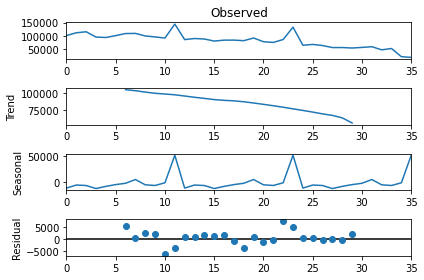

In [11]:
figure = decomposition.plot()

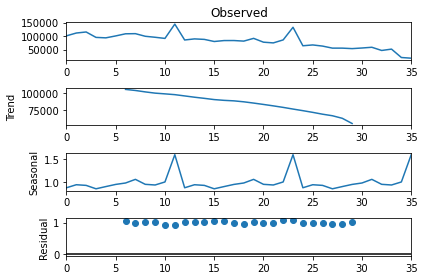

In [12]:
decomposition = sm.tsa.seasonal_decompose(y_array, period=12, model = 'multiplicative')
figure = decomposition.plot()

In [35]:
print('median: ',np.median(sales_train['item_cnt_day']))
print('mean: ',np.mean(sales_train['item_cnt_day']))
print('var: ',np.var(sales_train['item_cnt_day']))

median:  1.0
mean:  1.242640885140891
var:  6.858291440411886


In [34]:
print('median: ',np.median(sales_train['item_price']))
print('mean: ',np.mean(sales_train['item_price']))
print('var: ',np.var(sales_train['item_price']))

median:  399.0
mean:  890.8532326979881
var:  2992205.7432183735


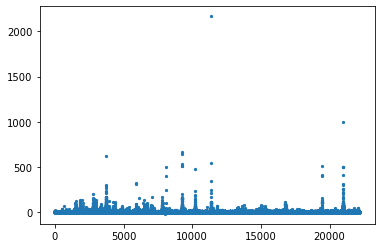

In [23]:
plt.scatter(sales_train['item_id'],sales_train['item_cnt_day'], s=4.9)

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

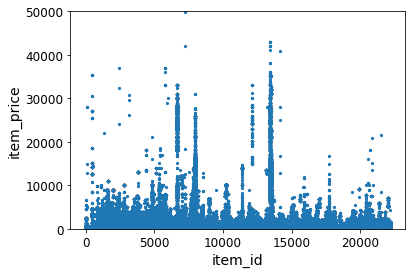

In [29]:
plt.scatter(sales_train['item_id'],sales_train['item_price'], s=4.9)
plt.ylim(0,50000)
plt.xlabel('item_id', fontsize=14)
plt.ylabel('item_price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

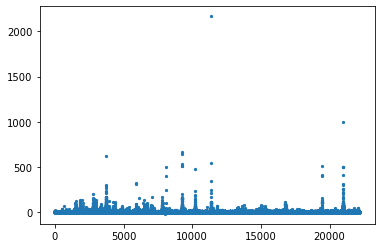

In [25]:
plt.scatter(sales_train['item_id'],sales_train['item_cnt_day'], s=4.9)

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

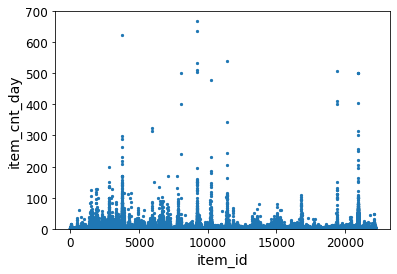

In [28]:
plt.scatter(sales_train['item_id'],sales_train['item_cnt_day'], s=4.9)
plt.ylim(0,700)
plt.xlabel('item_id', fontsize=14)
plt.ylabel('item_cnt_day', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

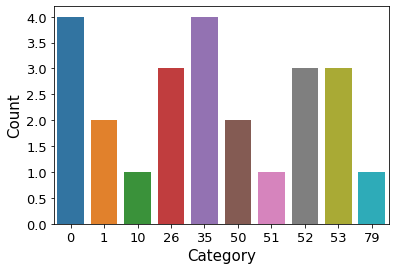

In [31]:
import seaborn as sns

categories=items.groupby(['item_category_id']).count()
categories=categories.sort_values(by='item_id')
categories=categories.iloc[0:10].reset_index()
ax= sns.barplot(x=categories.item_category_id, y=categories.item_id)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Category', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('plots/items_per_category.png')
plt.show()